In [2]:
import pandas as pd
import seaborn as sns
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import matplotlib
#import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection


%matplotlib inline

# Set pandas options to display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.precision', 2)

In [3]:
df = pd.read_csv(r'C:\Users\KAndr\OneDrive\Studia\I rok II semestr\ML\projekty\regresja\train.csv')
test = pd.read_csv(r'C:\Users\KAndr\OneDrive\Studia\I rok II semestr\ML\projekty\regresja\test.csv')
df = df.loc[:, df.columns != 'Id']
print(df.shape)
df.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Analysis

### Dependent variable

C:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


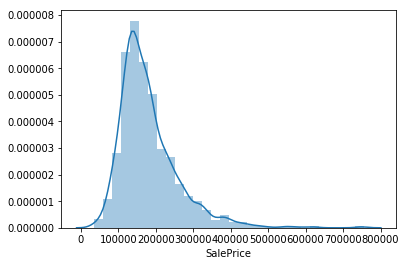

In [6]:
sns.distplot(df['SalePrice'], bins = 30)

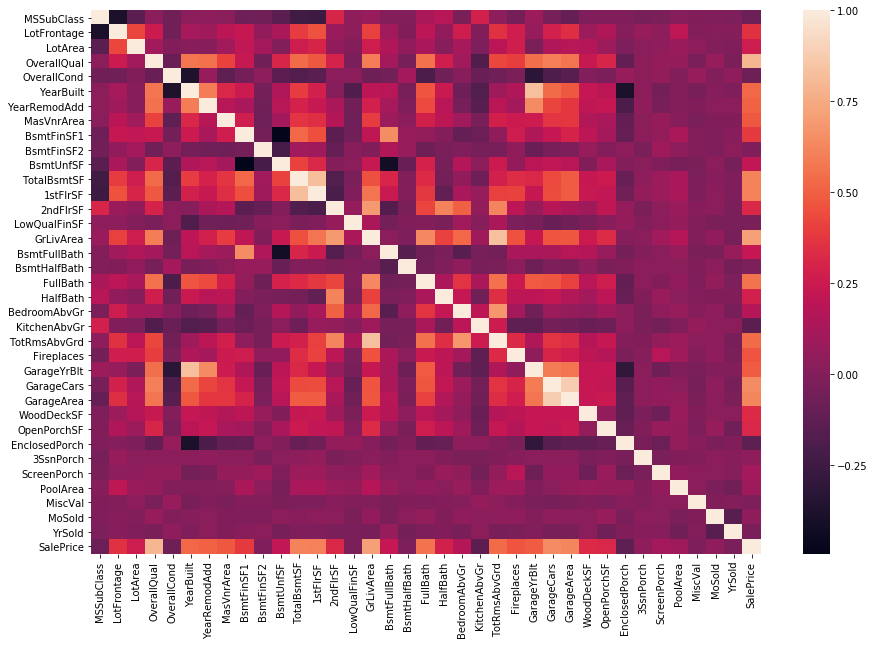

In [157]:
corrmat_all = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat_all);

Strongest correlated variables with Sale Price


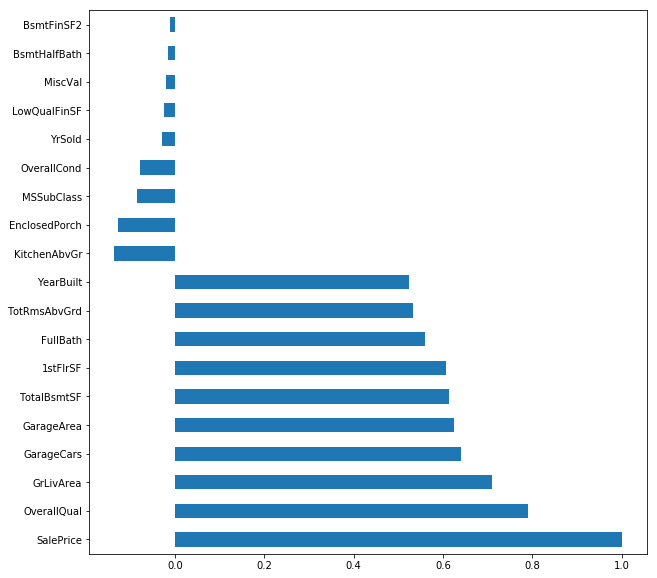

In [159]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
most_corr = pd.concat([corrmat_all.SalePrice.nlargest(10),
                     corrmat_all.SalePrice.nsmallest(9)])
print('Strongest correlated variables with Sale Price')
most_corr.plot(kind = "barh");


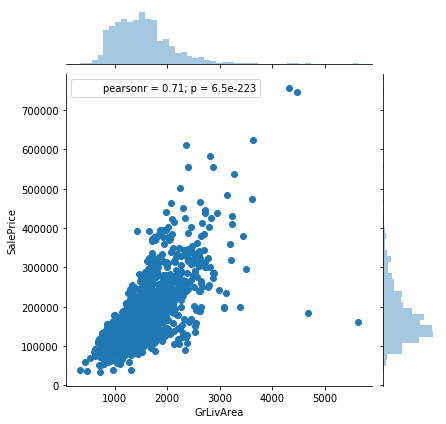

In [397]:
sns.jointplot(x="GrLivArea", y ='SalePrice', data = df);

There are two outliers with big living area that are relatively cheap, those observations will be removed

In [5]:
df = df[(df.GrLivArea < 4000) | (df.SalePrice > 300000)]

### Handling missing data

In [7]:
missings = pd.DataFrame(df.isna().sum(), columns=['missings']).sort_values(by='missings', ascending=False)
missings['N'] = df.shape[0]
missings['percent_of_missings'] = missings.missings/missings.N
print('Missings in training dataset')
missing_above_0 = missings[missings.missings > 0]
missing_above_0

Missings in training dataset


,missings,N,percent_of_missings
PoolQC,1452,1458,0.996
MiscFeature,1404,1458,0.963
Alley,1367,1458,0.938
Fence,1177,1458,0.807
FireplaceQu,690,1458,0.473
LotFrontage,259,1458,0.178
GarageYrBlt,81,1458,0.056
GarageCond,81,1458,0.056
GarageType,81,1458,0.056
GarageFinish,81,1458,0.056


Variables that get more than 10% of missing data, will be removed from our dataset. Rest of the variables have to be checked whether they give some additional information.

#### Garage variables

Firstly, there is variable GarageYrBlt which stands for year of garage built. It should be check with YearBuilt (Original construction date) if it is correlated. Important thing is that, those variables have same amount of missings, so it is probably some set of observations.

C:\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


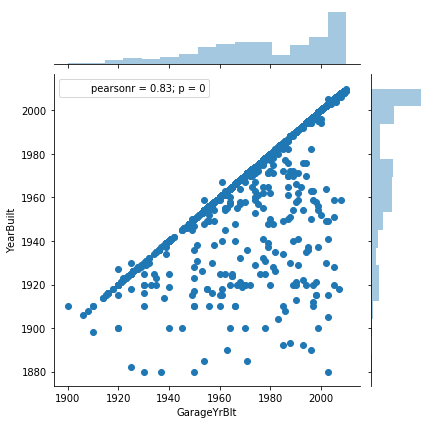

In [93]:
sns.jointplot(x='GarageYrBlt', y= 'YearBuilt', data=df);

Check all the other garage variables if they are not correlated with YearBuilt, SalePrice or internally.

In [140]:
garage_var = df[df.columns[(pd.Series(df.columns).str.startswith('Garage')) | pd.Series(df.columns).str.startswith('YearBuilt') | (pd.Series(df.columns).str.startswith('SalePrice'))]]
char_vars = garage_var.select_dtypes('object')
garage_var = garage_var.dropna()
garage_var.GarageType = garage_var.GarageType.astype(str)
garage_var.GarageFinish = garage_var.GarageFinish.astype(str)
garage_var.GarageQual = garage_var.GarageQual.astype(str)
garage_var.GarageCond = garage_var.GarageCond.astype(str)

In [141]:
le = preprocessing.LabelEncoder()
categorical_cols = char_vars.columns
garage_var[categorical_cols] = garage_var[categorical_cols].apply(lambda col: le.fit_transform(col))

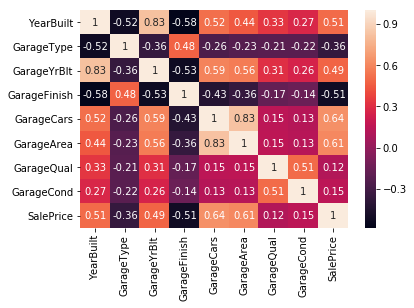

In [142]:
sns.heatmap(garage_var.corr(), annot = True);

It comes out that those variables are mostly strongly correlated with YearBuilt and with GarageArea and GarageCars (those two variables have no missing data). Moreover SalePrice has strongest correlation with GarageArea and GarageCars. In this case all garage variables with missing data will be removed.

#### Basement
There are 9 variables describing basement and 5 of them got missing values

In [114]:
bsmt_vars = df[df.columns[(pd.Series(df.columns).str.contains('Bsmt')) | (pd.Series(df.columns).str.startswith('SalePrice'))]]
bsmt_vars = bsmt_vars.dropna()
le = preprocessing.LabelEncoder()
categorical_cols = bsmt_vars.columns
bsmt_vars[categorical_cols] = bsmt_vars[categorical_cols].apply(lambda col: le.fit_transform(col))

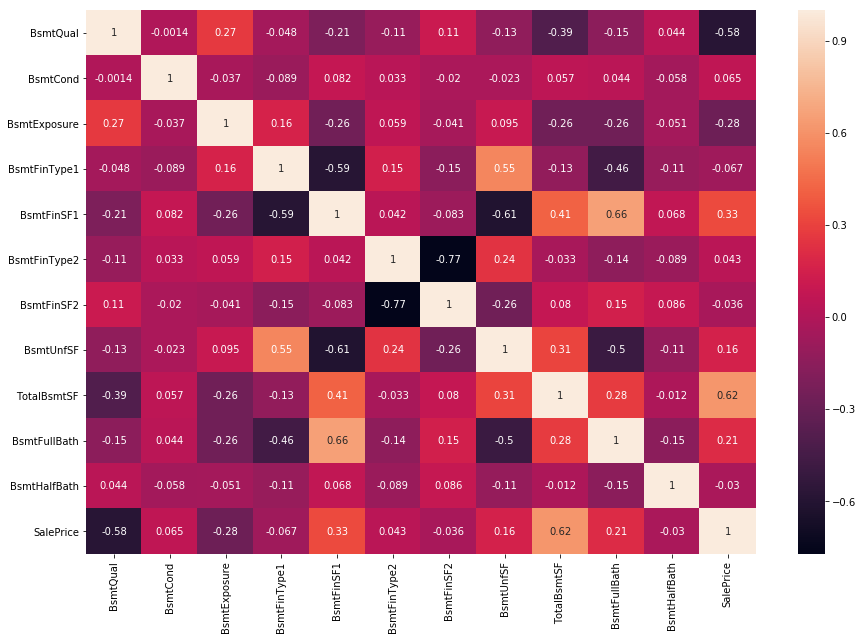

In [124]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(bsmt_vars.corr(), annot=True)

As in Garage variables case, all the Basement variables with missing data will be removed. The ones without missing data are correlated with SalePrice and other Basement features. There is no need to get that much of variables describing one thing.

#### Masonry veneer

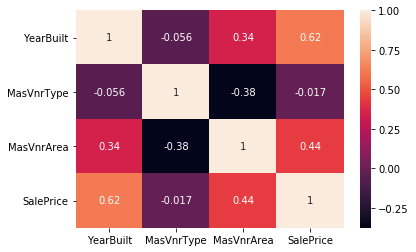

In [132]:
masvnr_vars = df[df.columns[(pd.Series(df.columns).str.contains('MasVnr')) | (pd.Series(df.columns).str.startswith('YearBuilt')) | (pd.Series(df.columns).str.startswith('SalePrice'))]]
masvnr_vars = masvnr_vars.dropna()
le = preprocessing.LabelEncoder()
categorical_cols = masvnr_vars.columns
masvnr_vars[categorical_cols] = masvnr_vars[categorical_cols].apply(lambda col: le.fit_transform(col))
sns.heatmap(masvnr_vars.corr(), annot=True)

In case of Masonry veneer variables, MasVnrType will be removed because, there is no much information from this variable. In MasVnrArea NULL values will be replaced with 0.

#### Electrical

Only one missing value, so this observation will be removed and variable will be kept.

In [8]:
missing_garage = list(missing_above_0.index)
missing_garage.remove('MasVnrArea')
missing_garage.remove("Electrical")
df = df.drop(missing_garage, axis=1)
df.MasVnrArea = df.MasVnrArea.fillna(0)
df = df.dropna()

# Variable transformation

In [37]:
import numpy as np
df.SalePrice = np.log(df.SalePrice)

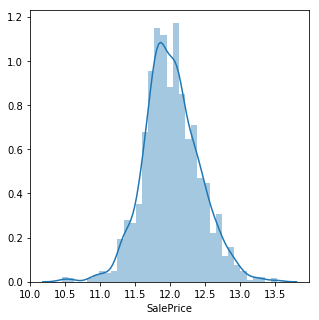

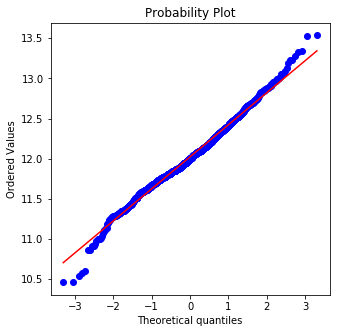

In [61]:
plt.figure(figsize=(5,5))
sns.distplot(df.SalePrice);
fig = plt.figure(figsize=(5,5))
stats.probplot(df.SalePrice, plot=plt)
plt.show()

# Feature selection

In [38]:
X = df.apply(preprocessing.LabelEncoder().fit_transform).loc[:,df.columns != 'SalePrice']
y = df.SalePrice

In [39]:
import warnings
warnings.filterwarnings("ignore")
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], random_state = 42).fit(X, y)

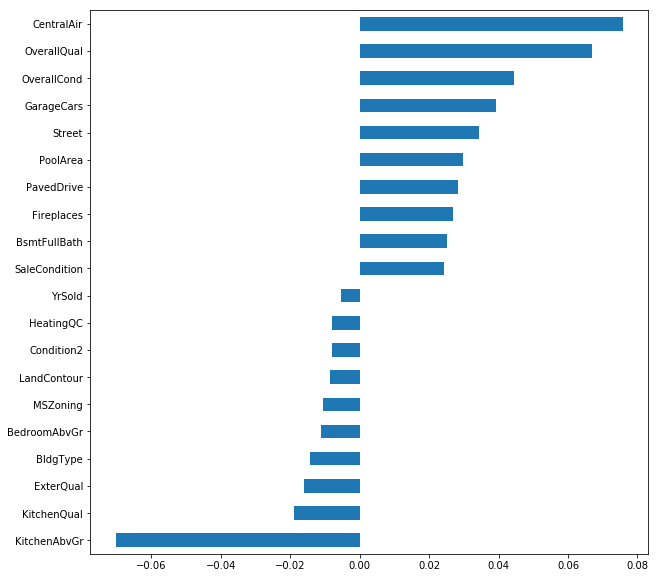

In [40]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
coef = pd.Series(model_lasso.coef_, index = X.columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

imp_coef.plot(kind = "barh");

# Training with cross-validation and grid-search

In [41]:
X = X.loc[:,list(coef.index)]

In [42]:
def param_selection(X, y, nfolds):
    
    # SVR
    Cs = [0.001, 0.01]
    gammas = [0.001]
    kernels = ['rbf']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel':kernels}
    grid_search = GridSearchCV(SVR(), param_grid, cv=nfolds, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    grid_search.best_params_
    print("Best SVR params: {}".format(grid_search.best_params_))
    
    # KNN
    Ks = [3,4,5]
    param_grid_knn = {'n_neighbors':Ks}
    grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=nfolds, scoring='neg_mean_squared_error')
    grid_search_knn.fit(X, y)
    grid_search_knn.best_params_
    print("Best KNN params: {}".format(grid_search_knn.best_params_))
    
    # Random Forest
    estimators = [100,200,300,500,700]
    max_depths = [4,6,8]
    param_grid_rf = {'n_estimators':estimators, 'max_depth':max_depths}
    grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=nfolds, scoring='neg_mean_squared_error')
    grid_search_rf.fit(X, y)
    grid_search_rf.best_params_
    print("Best RandomForest params: {}".format(grid_search_rf.best_params_))
    
    return grid_search.best_estimator_ , grid_search_knn.best_estimator_ , grid_search_rf.best_estimator_

In [43]:
model_svr, model_knn, model_rf = param_selection(X,y,5)

Best SVR params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
Best KNN params: {'n_neighbors': 5}
Best RandomForest params: {'max_depth': 8, 'n_estimators': 700}


SVR: -0.160636 (0.022549)
KNN: -0.039688 (0.007545)
RF: -0.019213 (0.004584)


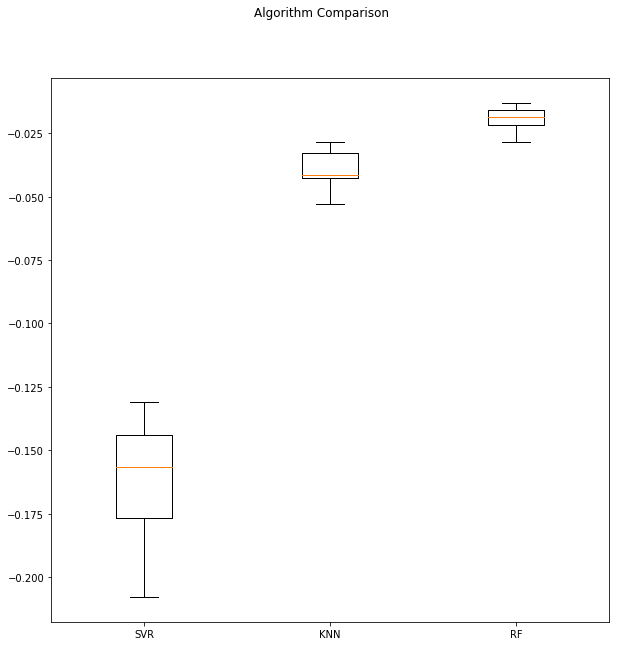

In [44]:
models = []
models.append(('SVR', model_svr))
models.append(('KNN', model_knn))
models.append(('RF', model_rf))

results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure();
fig.suptitle('Algorithm Comparison');
ax = fig.add_subplot(111);
plt.boxplot(results);
ax.set_xticklabels(names);
plt.show();

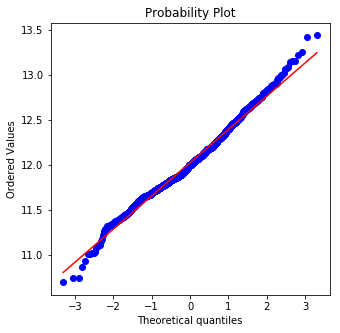

In [66]:
from scipy import stats
y_train_pred = model_rf.predict(X)
fig = plt.figure(figsize=(5,5))
stats.probplot(y_train_pred, plot=plt)
plt.show()

### Test set

In [45]:
test.KitchenQual = test.KitchenQual.astype(str)
test.Utilities = test.Utilities.astype(str)
test.SaleType = test.SaleType.astype(str)
test.Exterior2nd = test.Exterior2nd.astype(str)
test.MSZoning = test.MSZoning.astype(str)
test.Exterior1st = test.Exterior1st.astype(str)
test.Functional = test.Functional.astype(str)


X_test = test.loc[:,list(coef.index)]
X_test = X_test.apply(preprocessing.LabelEncoder().fit_transform)
#X_test = X_test.fillna(0)

In [67]:
y_pred = model_knn.predict(X_test)
y_pred = np.exp(y_pred)

In [68]:
results = pd.concat([test.Id, pd.DataFrame(y_pred, columns=['SalePrice'])], axis = 1)
results = results.set_index('Id')

In [69]:
results.to_csv('submission_knn.csv')